In [1]:
#Inflation API

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import os
from pprint import pprint
from config import countries
from config import base_country

In [3]:
inflation_countries = ['belarus', 'brazil','canada', 'european-union', 'eurozone', 'france', 'germany', 'greece', 'india', 'japan', 'kazakhstan', 'mexico', 'russia', 'spain', 'turkey', 'ukraine', 'united-kingdom', 'united-states']
years = [2020,2019,2018,2017,2016,2015,2014]
y = {}
for a in range (2014,2021):
    y[a] = []

In [4]:
for year in years:
    for country in inflation_countries:
        start_date = f"{year}/1/1"
        end_date = f"{year}/12/1"
        base_url = "https://www.statbureau.org/calculate-inflation-rate-json"
        params = {'country': country, 'start': start_date, 'end': end_date}
        response = requests.get(base_url,params).json()
        y[year].append(response)

In [5]:
inflation = {"Country": inflation_countries, "2020": y[2020], "2019": y[2019], "2018": y[2018], "2017": y[2017], "2016":y[2016], "2015": y[2015], "2014": y[2014]}
inflation_df = pd.DataFrame(inflation)

In [6]:
inflation_df = inflation_df.drop(columns=['2020'])
inflation_df["Country"] = inflation_df["Country"].str.title()
inflation_df

,Country,2019,2018,2017,2016,2015,2014
0,Belarus,0.88,5.64,4.59,10.58,11.97,16.22
1,Brazil,0.32,3.75,2.95,6.29,10.67,6.41
2,Canada,0,1.99,1.87,1.5,1.61,1.47
3,European-Union,1.57,1.63,1.64,1.14,0.18,-0.08
4,Eurozone,1.33,1.52,1.34,1.1,0.25,-0.17
5,France,-0.47,1.59,1.19,0.61,0.18,0.06
6,Germany,0,1.72,1.65,1.68,0.28,0.19
7,Greece,-1.77,0.56,0.65,0.02,-0.17,-2.61
8,India,0,5.24,4,2.23,6.32,5.86
9,Japan,0.79,0.3,1.1,0.3,0.1,2.36


In [7]:
inflation_df["Country"] = inflation_df["Country"].replace(["European-Union","United-Kingdom","United-States"], ["European Union","United Kingdom","United States"])
inflation_df

,Country,2019,2018,2017,2016,2015,2014
0,Belarus,0.88,5.64,4.59,10.58,11.97,16.22
1,Brazil,0.32,3.75,2.95,6.29,10.67,6.41
2,Canada,0,1.99,1.87,1.5,1.61,1.47
3,European Union,1.57,1.63,1.64,1.14,0.18,-0.08
4,Eurozone,1.33,1.52,1.34,1.1,0.25,-0.17
5,France,-0.47,1.59,1.19,0.61,0.18,0.06
6,Germany,0,1.72,1.65,1.68,0.28,0.19
7,Greece,-1.77,0.56,0.65,0.02,-0.17,-2.61
8,India,0,5.24,4,2.23,6.32,5.86
9,Japan,0.79,0.3,1.1,0.3,0.1,2.36


In [8]:
country_name = []
currency = []
curr_code = []
for country in countries:
    country_name.append(country)
    currency.append(countries[country]["currency_name"])
    curr_code.append(countries[country]["currency_code"])

currencies = {"Country": country_name, "Currency": currency, "Currency Code": curr_code}
currencies_df = pd.DataFrame(currencies)
currencies_df

,Country,Currency,Currency Code
0,European Union,Euro,EUR
1,Japan,Japanese Yen,JPY
2,United Kingdom,Pound Sterling,GBP
3,Australia,Australian Dollar,AUD
4,Canada,Canadian Dollar,CAD
5,Switzerland,Swiss Franc,CHF
6,Sweden,Swedish Krona,SEK
7,New Zealand,New Zealand Dollar,NZD
8,Hong Kong,Hong Kong Dollar,HKD
9,Belarus,Belarusian Ruble,BYN


In [9]:
inflation_df = inflation_df.merge(currencies_df, on="Country", how="left")
inflation_df = inflation_df[["Country","Currency Code","Currency","2019","2018","2017","2016","2015","2014"]]
inflation_df

,Country,Currency Code,Currency,2019,2018,2017,2016,2015,2014
0,Belarus,BYN,Belarusian Ruble,0.88,5.64,4.59,10.58,11.97,16.22
1,Brazil,BRL,Brazilian Real,0.32,3.75,2.95,6.29,10.67,6.41
2,Canada,CAD,Canadian Dollar,0,1.99,1.87,1.5,1.61,1.47
3,European Union,EUR,Euro,1.57,1.63,1.64,1.14,0.18,-0.08
4,Eurozone,NaN,NaN,1.33,1.52,1.34,1.1,0.25,-0.17
5,France,NaN,NaN,-0.47,1.59,1.19,0.61,0.18,0.06
6,Germany,NaN,NaN,0,1.72,1.65,1.68,0.28,0.19
7,Greece,NaN,NaN,-1.77,0.56,0.65,0.02,-0.17,-2.61
8,India,INR,Indian Rupee,0,5.24,4,2.23,6.32,5.86
9,Japan,JPY,Japanese Yen,0.79,0.3,1.1,0.3,0.1,2.36


In [10]:
inflation_df.iloc[17,1] = base_country["currency_code"]
inflation_df.iloc[17,2] = base_country["currency_name"]
inflation_df

,Country,Currency Code,Currency,2019,2018,2017,2016,2015,2014
0,Belarus,BYN,Belarusian Ruble,0.88,5.64,4.59,10.58,11.97,16.22
1,Brazil,BRL,Brazilian Real,0.32,3.75,2.95,6.29,10.67,6.41
2,Canada,CAD,Canadian Dollar,0,1.99,1.87,1.5,1.61,1.47
3,European Union,EUR,Euro,1.57,1.63,1.64,1.14,0.18,-0.08
4,Eurozone,NaN,NaN,1.33,1.52,1.34,1.1,0.25,-0.17
5,France,NaN,NaN,-0.47,1.59,1.19,0.61,0.18,0.06
6,Germany,NaN,NaN,0,1.72,1.65,1.68,0.28,0.19
7,Greece,NaN,NaN,-1.77,0.56,0.65,0.02,-0.17,-2.61
8,India,INR,Indian Rupee,0,5.24,4,2.23,6.32,5.86
9,Japan,JPY,Japanese Yen,0.79,0.3,1.1,0.3,0.1,2.36


In [11]:
year_data = [2014,2015,2016,2017,2018,2019]
for year in year_data:
    yr = str(year)
    inflation_df[yr] = inflation_df[yr].apply(pd.to_numeric)
inflation_df.dtypes

Country           object
Currency Code     object
Currency          object
2019             float64
2018             float64
2017             float64
2016             float64
2015             float64
2014             float64
dtype: object

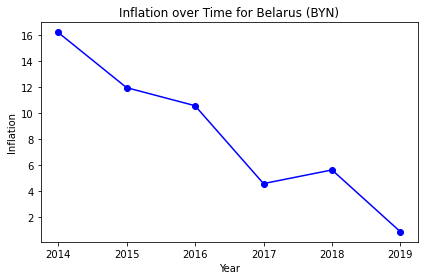

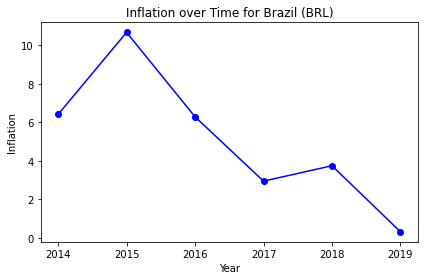

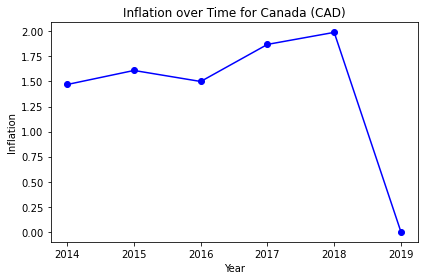

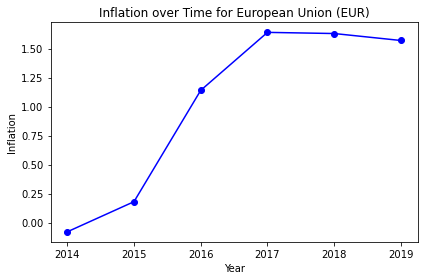

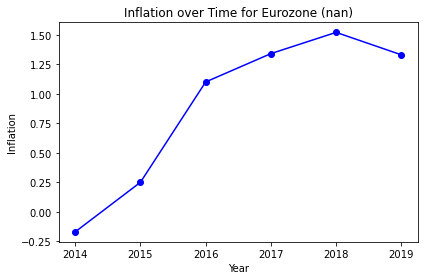

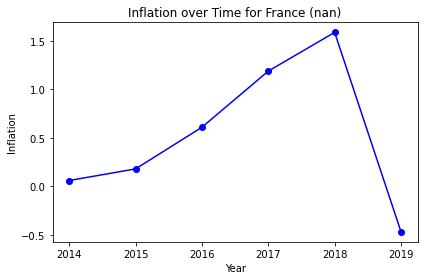

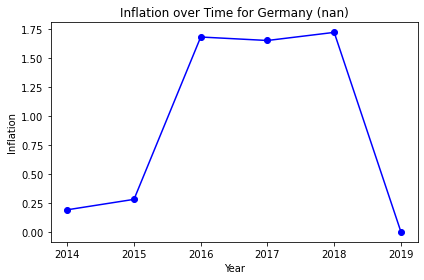

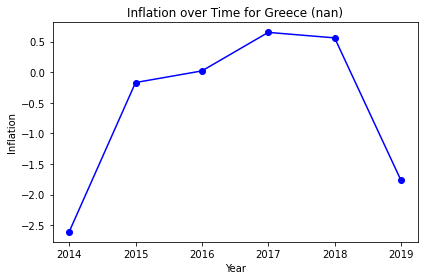

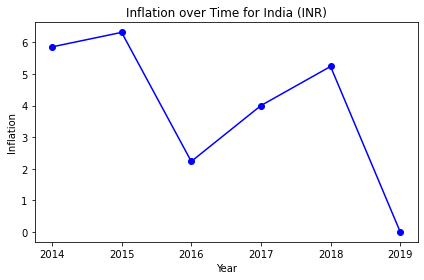

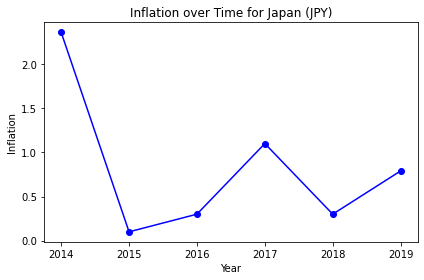

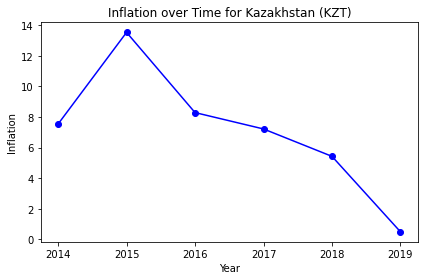

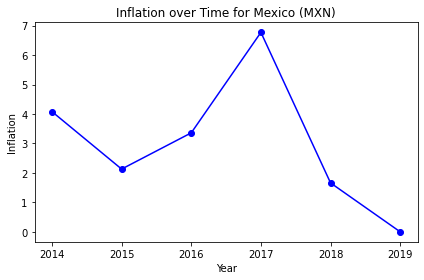

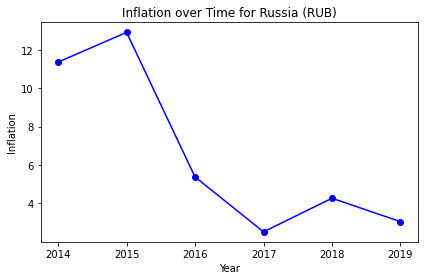

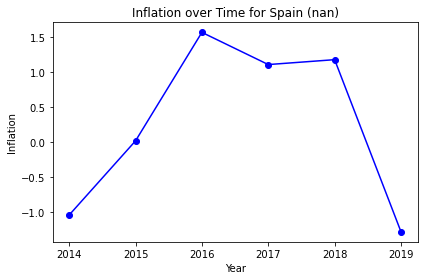

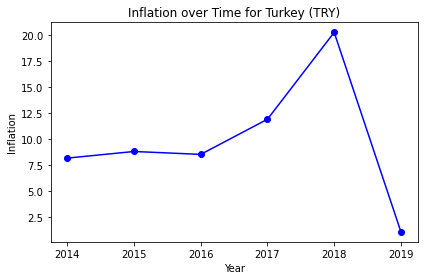

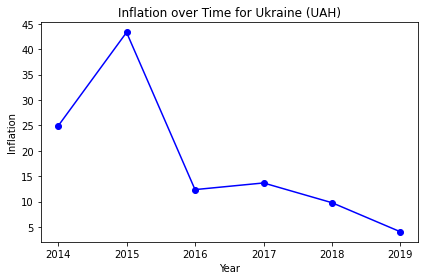

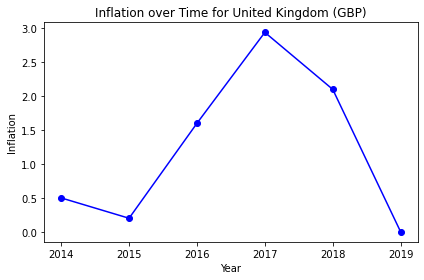

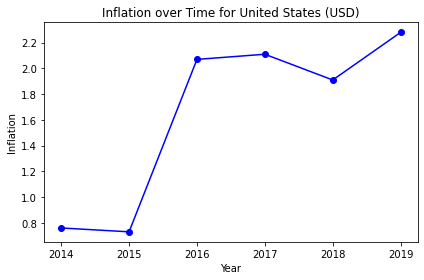

In [12]:
year_data = [2014,2015,2016,2017,2018,2019]

for index, row in inflation_df.iterrows():
    inflation_data = []
    ctry = row["Country"]
    crrcy_code = row["Currency Code"]
    inflation_data.append(row["2014"])
    inflation_data.append(row["2015"])
    inflation_data.append(row["2016"])
    inflation_data.append(row["2017"])
    inflation_data.append(row["2018"])
    inflation_data.append(row["2019"])
    plt.plot(year_data, inflation_data, marker='o', color='b')
    plt.title(f"Inflation over Time for {ctry} ({crrcy_code})")
    plt.xlabel("Year")
    plt.ylabel("Inflation")
    plt.tight_layout()
    plt.savefig(f"Output/InflationChart_{ctry}.png")
    plt.show()